# ML-MAJOR-APR-ML043B10

#### PROJECT BY : Vanshika Mediratta, Siddhant Gupta, Ananyaa Shrivastava, Chirag Shyam Magnani, Aditya Gowrish, Satyam Pavan, Animesh Jain, Khsuhi Garg, Srikanth Kollepara, Tanish Malekar, Ashwin Mani, Pokhraj Prasad, Magavath Sai Teja, Nishkank Shah, Abhishekh Shelke

### PROBLEM STATEMENT:
Predicting the costs of used cars given the data collected from from various sources and distributed across various locations.

#### FEATURES:
1. Name: The brand and model of the car.
2. Location : The location n which the car is being sold.
3. Year: The year or edition of the model.
4. Kilometers_Driven : The total Kilometers driven by the the previous owners.
5. Fuel_Type : The type of fuel used ny the car.
6. Transmission : The type of transmission used by the car.
7. Owner_Type : Whether the ownership is first hand, second hand or other.
8. Mileage : The standard mileage offered.
9. Engine : The displacement volume of the engine.
10. Power: Maximum power of engine in bph.
11. Seats : The number of seats in the car.
12. Price : The price of the car in INR (lakhs).

#### Importing Libraries
To begin with, we imported the numpy and pandas libraries to read through the data.
 We imported matplotlib and seaborn libraries to help visualize the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

import warnings
warnings.filterwarnings('ignore')

#### Reading the data
The following code is used to load the dataset that is titled 'Data_Train.csv'.
To better understand the data, we use shape function which returns a tuple consisting of the number of rows and columns of the dataset.
info() or isnull.sum() helps in pointing out any null values in the dataset. In this case, there are none.
Similarly, we write the code for the test data.

In [3]:
train_data = pd.read_excel("Data_Train.xlsx") 
train_data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [5]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [6]:
train_data.shape

(6019, 12)

In [7]:
test_data = pd.read_excel("Data_Test.xlsx") 
test_data.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [8]:
test_data.shape

(1234, 11)

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null object
Power                1224 non-null object
Seats                1223 non-null float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


In [10]:
plt.style.use('ggplot')

In [11]:
plt.rcParams['figure.figsize'] = (10,7)

In [12]:
train_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [13]:
test_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [14]:
train_data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

#### Data Wrangling / Cleaning the Data
In this section, we will clean the data and deal with null values to give us a better insight of the data.

In [15]:
mil = train_data['Mileage'].mode()[0]
train_data['Mileage'] = train_data['Mileage'].fillna(mil)

In [16]:
train_data.Mileage.isnull().sum()

0

In [17]:
eng = train_data['Engine'].mode()[0]
train_data['Engine'] = train_data['Engine'].fillna(eng)

In [18]:
train_data.Engine.isnull().sum()

0

In [19]:
eng1 = test_data['Engine'].mode()[0]
test_data['Engine'] = test_data['Engine'].fillna(eng1)

In [20]:
test_data['Engine'].isnull().sum()

0

In [21]:
test_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                10
Seats                11
dtype: int64

In [22]:
train_data['Power'] = train_data['Power'].fillna(train_data['Power'].mode()[0])

In [23]:
train_data['Price'] = train_data['Price'].fillna(train_data['Price'].mode()[0])

In [24]:
train_data['Seats'] = train_data['Seats'].fillna(train_data['Seats'].mode()[0])

In [25]:
test_data['Power'] = test_data['Power'].fillna(test_data['Power'].mode()[0])
test_data['Seats'] = test_data['Seats'].fillna(test_data['Seats'].mode()[0])

In [26]:
le = LabelEncoder()

In [27]:
train_data["Name"] = train_data["Name"].str.split(" ").str[0]

In [28]:
train_data['Brand'] = le.fit_transform(train_data["Name"])

In [29]:
test_data["Name"] = test_data["Name"].str.split(" ").str[0]

In [30]:
test_data['Brand'] = le.fit_transform(test_data["Name"])

In [31]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,18
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,10
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,9
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,18
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,1


#### Data Exploration / Visualization
In this section, we have tried to explore the relationship within the data and the target 'Price' using vidual techniques. The basic plots used here are countplots, piecharts, heatmaps, distplot, pairplot, lmplot, boxplot, catplot, histograms.

Text(0.5, 1.0, 'Distribution across Locations')

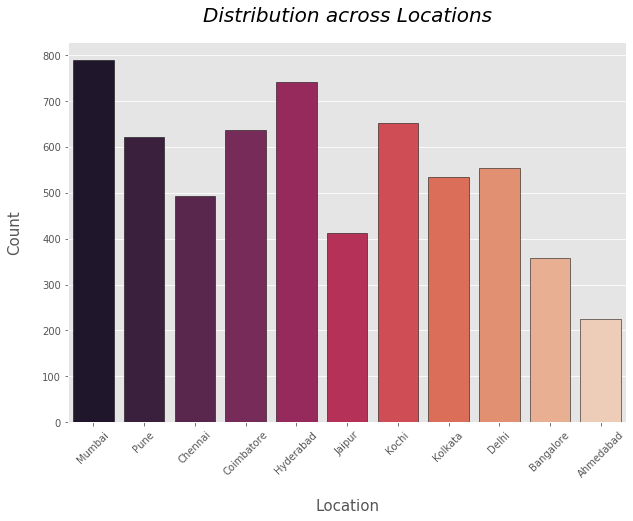

In [32]:
#Location
sns.countplot(x = 'Location', data = train_data, palette = 'rocket', edgecolor = 'k')
plt.xticks(rotation = 45)
plt.xlabel('Location', fontsize = 15, labelpad = 20)
plt.ylabel('Count', fontsize = 15, labelpad = 20)
plt.title('Distribution across Locations', fontsize = 20, fontstyle = 'italic', pad = 20)

Text(0, 0.5, 'Count')

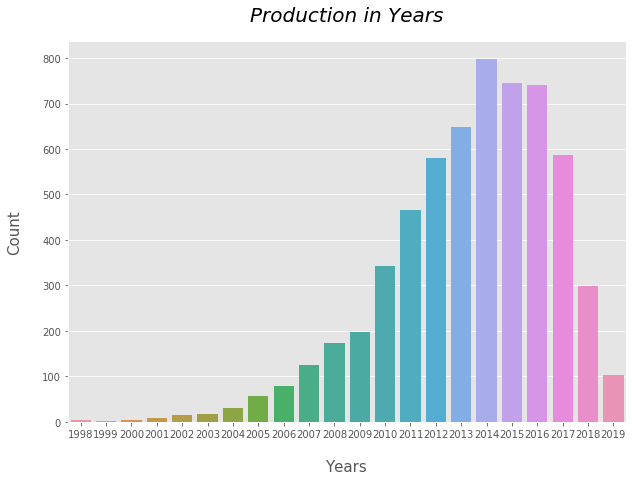

In [33]:
#Year
sns.countplot(x = 'Year', data = train_data)
plt.title('Production in Years', fontstyle = 'italic', fontsize = 20, pad = 20)
plt.xlabel('Years', labelpad = 20, fontsize = 15)
plt.ylabel('Count', labelpad = 20, fontsize = 15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

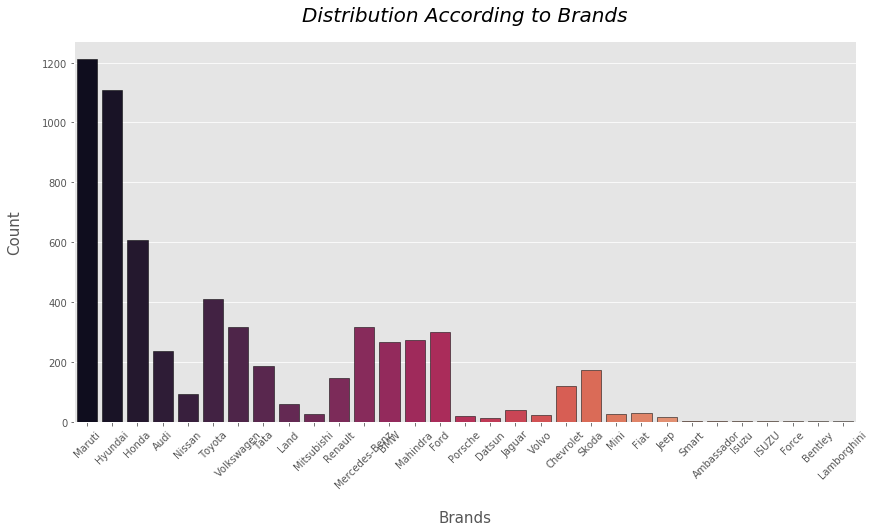

In [34]:
# Name
plt.rcParams['figure.figsize'] = (14,7)
sns.countplot(x = 'Name', data = train_data, palette = 'rocket', edgecolor = 'k')
plt.title('Distribution According to Brands', pad = 20, fontstyle = 'italic', fontsize = 20)
plt.xlabel('Brands', labelpad = 20, fontsize = 15)
plt.ylabel('Count', labelpad = 20, fontsize = 15)
plt.xticks(rotation = 45)

Text(0, 0.5, 'Count')

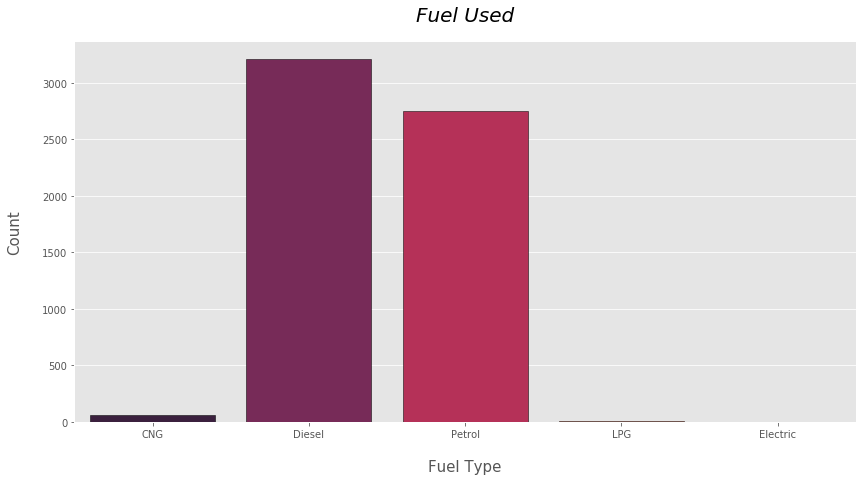

In [35]:
sns.countplot(x = 'Fuel_Type', data = train_data, palette = 'rocket', edgecolor = 'k')
plt.title('Fuel Used', fontstyle = 'italic', fontsize = 20, pad = 20)
plt.xlabel('Fuel Type', labelpad = 20, fontsize = 15)
plt.ylabel('Count', labelpad = 20, fontsize = 15)

Text(0.5, 1, 'Piechart for Type of Fuel Used')

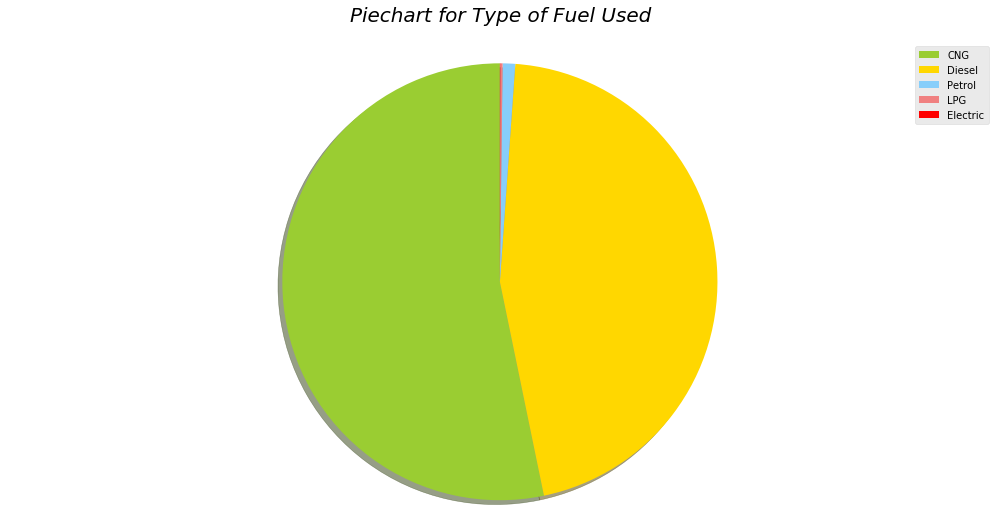

In [36]:
# Piechart
labels = ['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']
patches, texts = plt.pie(train_data['Fuel_Type'].value_counts(), colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Piechart for Type of Fuel Used', fontstyle = 'italic', fontsize = 20, pad = 20)

Text(0, 0.5, 'Count')

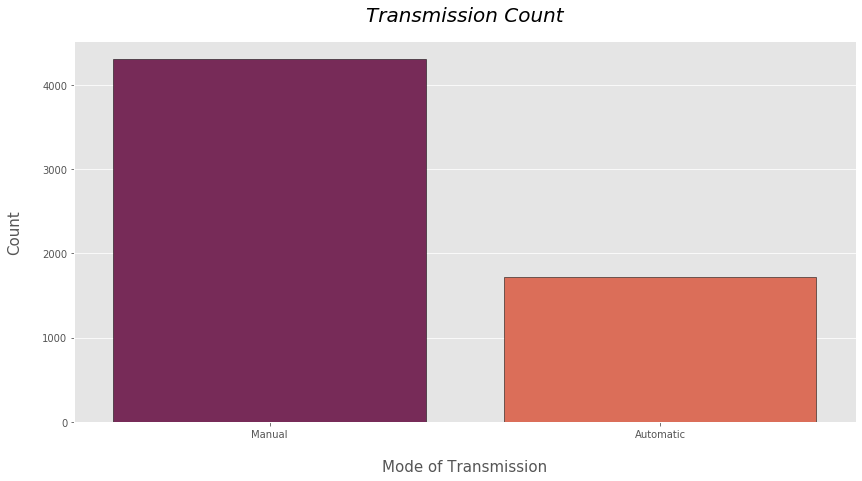

In [37]:
sns.countplot(x = 'Transmission', data = train_data, palette = 'rocket', edgecolor = 'k')
plt.title('Transmission Count', pad = 20, fontstyle = 'italic', fontsize = 20)
plt.xlabel('Mode of Transmission', labelpad = 20, fontsize = 15)
plt.ylabel('Count', labelpad = 20, fontsize = 15)

Text(0, 0.5, 'Count')

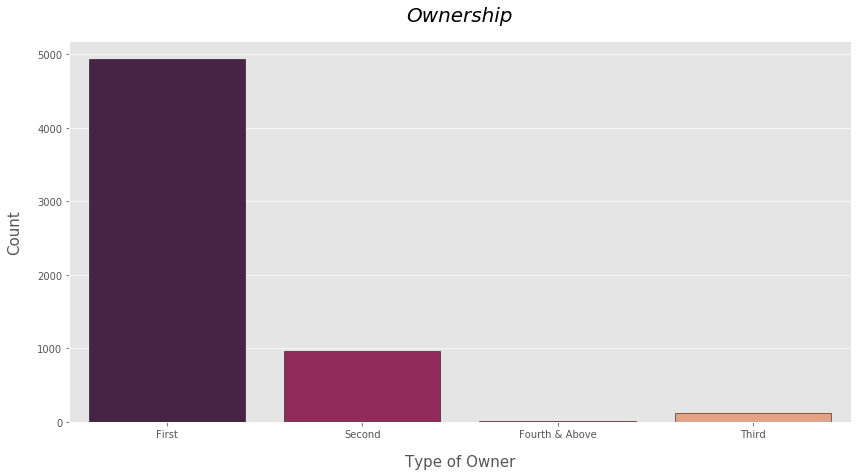

In [38]:
# Owner Type
sns.countplot(x = 'Owner_Type', data = train_data, palette = 'rocket', edgecolor = 'k')
plt.title('Ownership', fontstyle = 'italic', fontsize = 20, pad = 20)
plt.xlabel('Type of Owner', labelpad = 15, fontsize = 15)
plt.ylabel('Count', labelpad = 15, fontsize = 15)

Text(0, 0.5, 'Count')

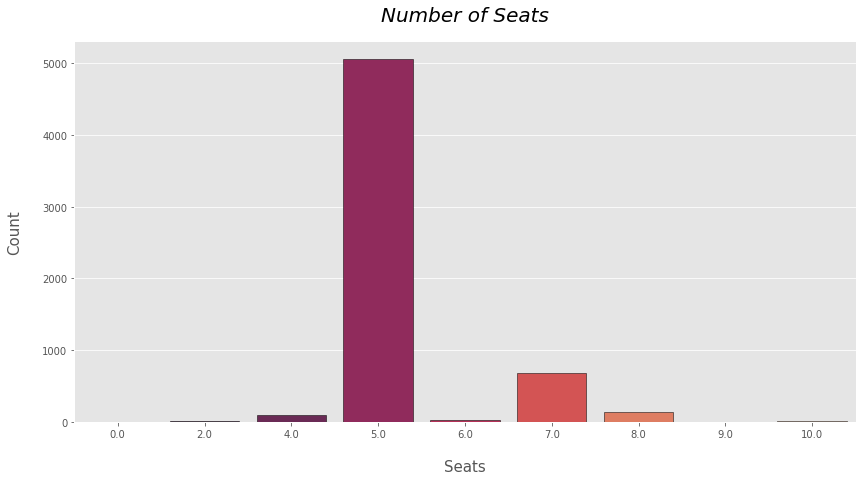

In [39]:
# Seats
sns.countplot(x = 'Seats', data = train_data, palette = 'rocket', edgecolor = 'k')
plt.title('Number of Seats', fontsize = 20, fontstyle = 'italic', pad = 20)
plt.xlabel('Seats', labelpad = 20, fontsize = 15)
plt.ylabel('Count', labelpad = 20, fontsize = 15)

In [40]:
train_data['Engine'] = train_data['Engine'].apply(lambda y: y.replace('CC', '')).astype(int)

In [41]:
test_data['Engine'] = test_data['Engine'].apply(lambda y: y.replace('CC', '')).astype(int)

In [42]:
train_data['Power'] = train_data['Power'].apply(lambda z: z.replace(' bhp', '0').replace('null', '0.')).astype(float)

In [43]:
test_data['Power'] = test_data['Power'].apply(lambda z: z.replace(' bhp', '0').replace('null', '0.')).astype(float)

In [44]:
train_data['Mileage'] = train_data['Mileage'].apply(lambda x: x.replace(' km/kg', '0').replace(' kmpl', '0')).astype(float)

In [45]:
test_data['Mileage'] = test_data['Mileage'].apply(lambda x: x.replace(' km/kg', '0').replace(' kmpl', '0')).astype(float)

In [46]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,18
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,10
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,9
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,18
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,1


Text(0, 0.5, 'Frequency')

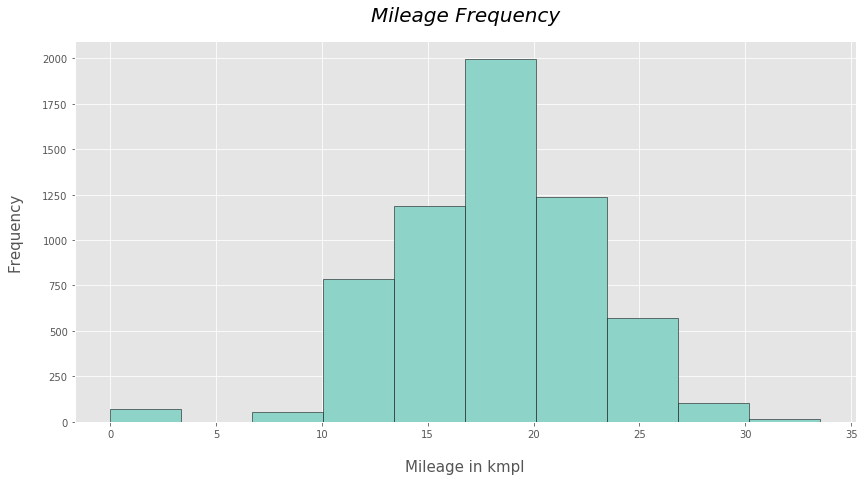

In [47]:
# Mileage
train_data['Mileage'].plot.hist(bins = 10, cmap = 'Set3', edgecolor = 'k')
plt.title('Mileage Frequency', fontstyle = 'italic', fontsize = 20, pad = 20)
plt.xlabel('Mileage in kmpl', fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad = 20)

Text(0, 0.5, 'Frequency')

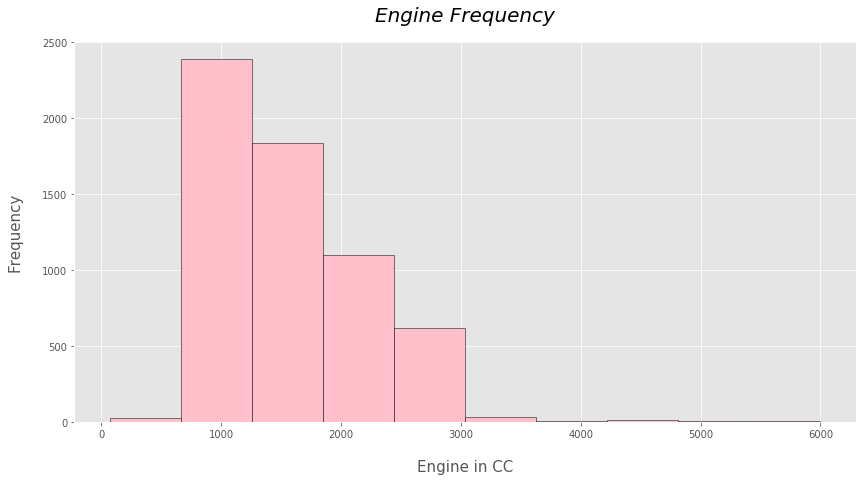

In [48]:
# Engine
train_data['Engine'].plot.hist(bins = 10, color = 'pink', edgecolor = 'k')
plt.title('Engine Frequency', fontstyle = 'italic', fontsize = 20, pad = 20)
plt.xlabel('Engine in CC', labelpad = 20, fontsize = 15)
plt.ylabel('Frequency', labelpad = 20, fontsize = 15)

Text(0, 0.5, 'Frequency')

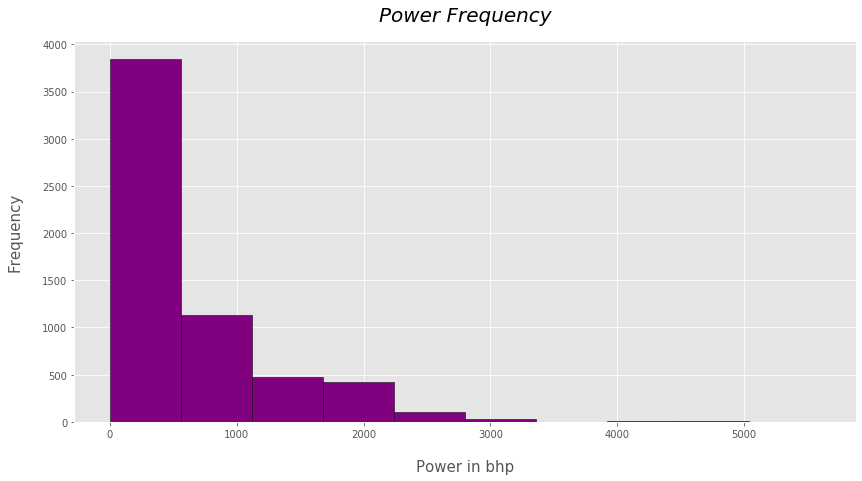

In [49]:
# Power
train_data['Power'].plot.hist(bins = 10, edgecolor = 'k', color = 'purple')
plt.title('Power Frequency', fontstyle = 'italic', fontsize = 20, pad = 20)
plt.xlabel('Power in bhp', fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad = 20)

In [50]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,18
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,10
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,9
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,18
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

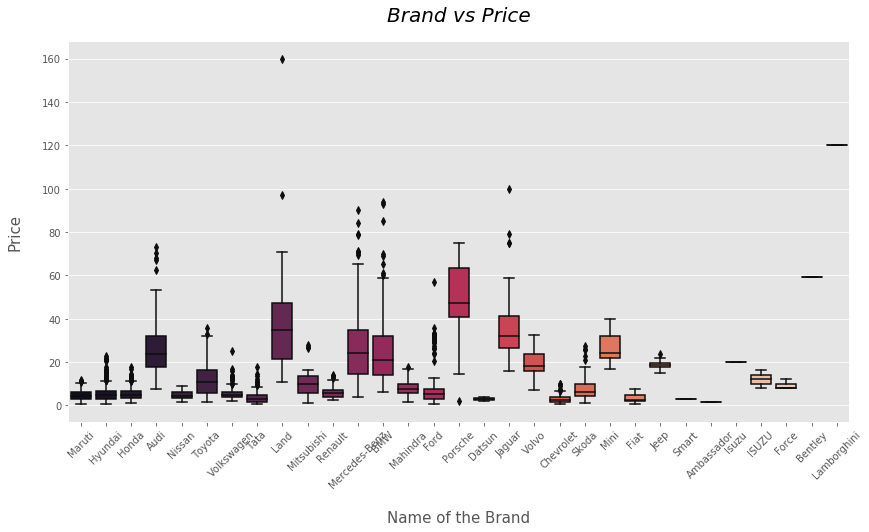

In [51]:
#Brand and Price
sns.boxplot(x = 'Name', y = 'Price', data = train_data, palette = 'rocket')
plt.title('Brand vs Price', fontstyle = 'italic', fontsize = 20, pad = 20)
plt.xlabel('Name of the Brand', fontsize = 15, labelpad = 20)
plt.ylabel('Price', fontsize = 15, labelpad = 20)
plt.xticks(rotation = 45)

Text(0, 0.5, 'Price')

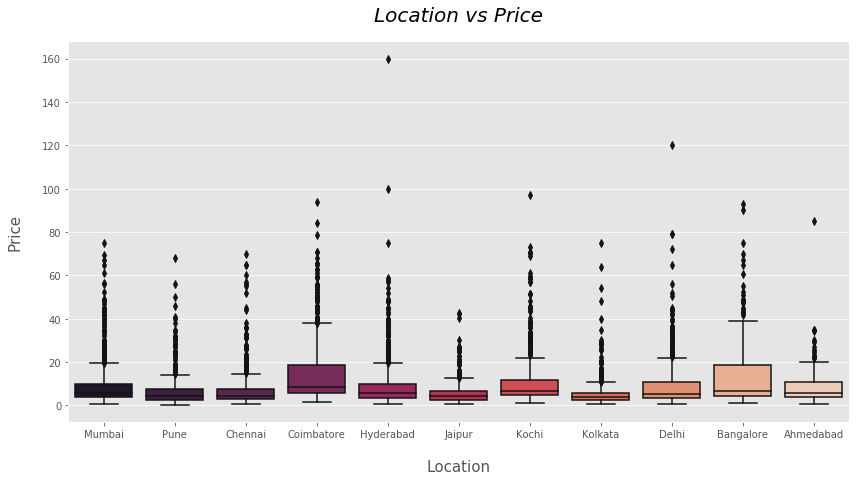

In [52]:
#Prics vs Location
sns.boxplot(x = 'Location', y = 'Price', data = train_data, palette = 'rocket')
plt.title('Location vs Price', fontstyle = 'italic', fontsize = 20, pad = 20)
plt.xlabel('Location', fontsize = 15, labelpad = 20)
plt.ylabel('Price', fontsize = 15, labelpad = 20)

Text(0, 0.5, 'Price')

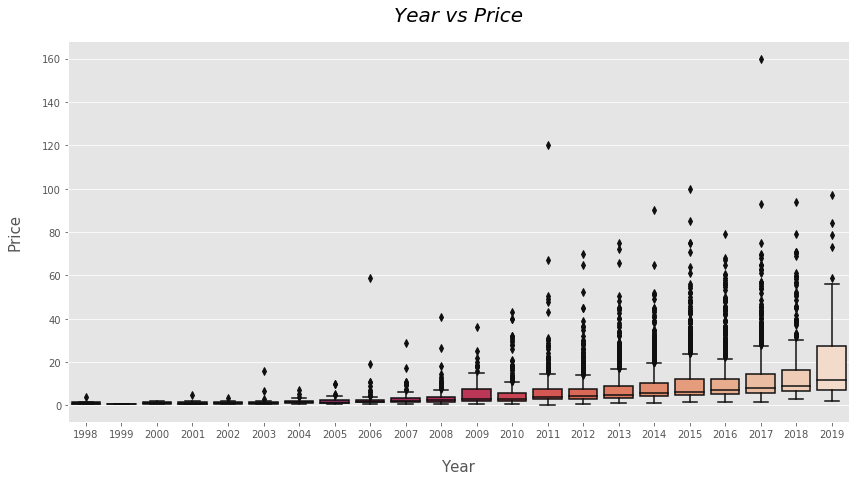

In [53]:
# Year vs Price
sns.boxplot(x = 'Year', y = 'Price', data = train_data, palette = 'rocket')
plt.title('Year vs Price', fontstyle = 'italic', fontsize = 20, pad = 20)
plt.xlabel('Year', labelpad = 20, fontsize = 15)
plt.ylabel('Price', labelpad = 20, fontsize = 15)

Text(0, 0.5, 'Price')

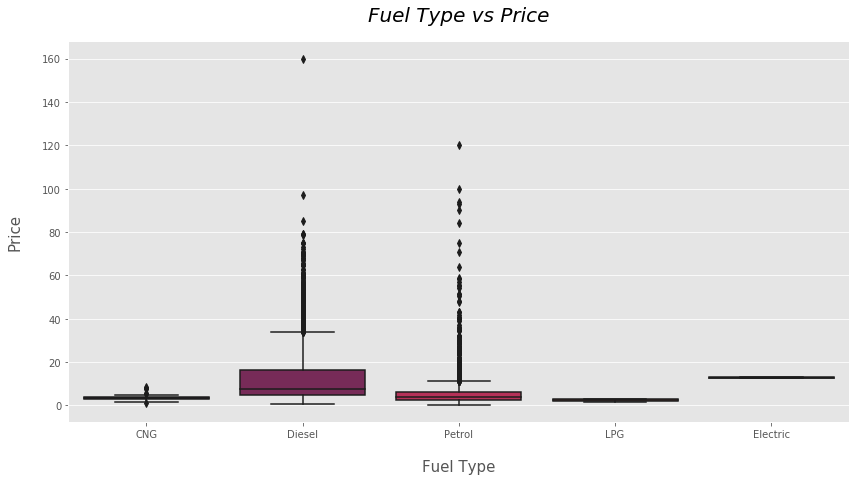

In [54]:
# Fuel Type vs Price
sns.boxplot(x = 'Fuel_Type', y = 'Price', data = train_data, palette = 'rocket')
plt.title('Fuel Type vs Price', fontstyle = 'italic', fontsize = 20, pad = 20)
plt.xlabel('Fuel Type', labelpad = 20, fontsize = 15)
plt.ylabel('Price', labelpad = 20, fontsize = 15)

Text(0, 0.5, 'Price')

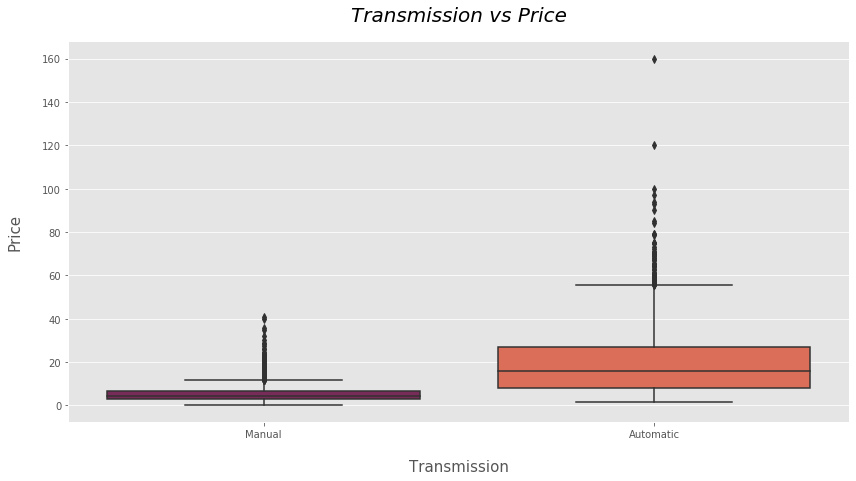

In [55]:
 #Transmission vs Price
sns.boxplot(x = 'Transmission', y = 'Price', data = train_data, palette = 'rocket')
plt.title('Transmission vs Price', fontstyle = 'italic',fontsize =20,pad =20)
plt.xlabel('Transmission', fontsize = 15, labelpad = 20)
plt.ylabel('Price', fontsize = 15, labelpad = 20)

Text(0, 0.5, 'Price')

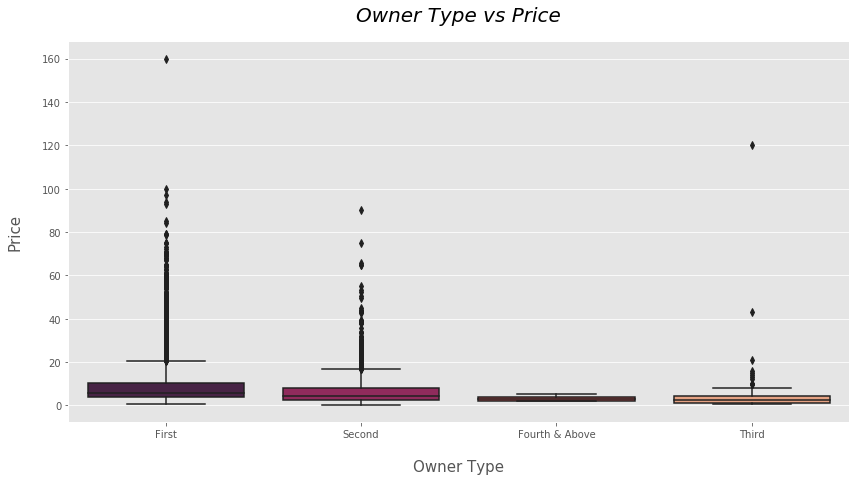

In [56]:
#Owner Type vs Price
sns.boxplot(x = 'Owner_Type', y = 'Price', data = train_data, palette = 'rocket')
plt.title('Owner Type vs Price', fontstyle = 'italic', fontsize = 20, pad = 20)
plt.xlabel('Owner Type', fontsize = 15, labelpad = 20)
plt.ylabel('Price', fontsize = 15, labelpad = 20)

Text(0, 0.5, 'Price')

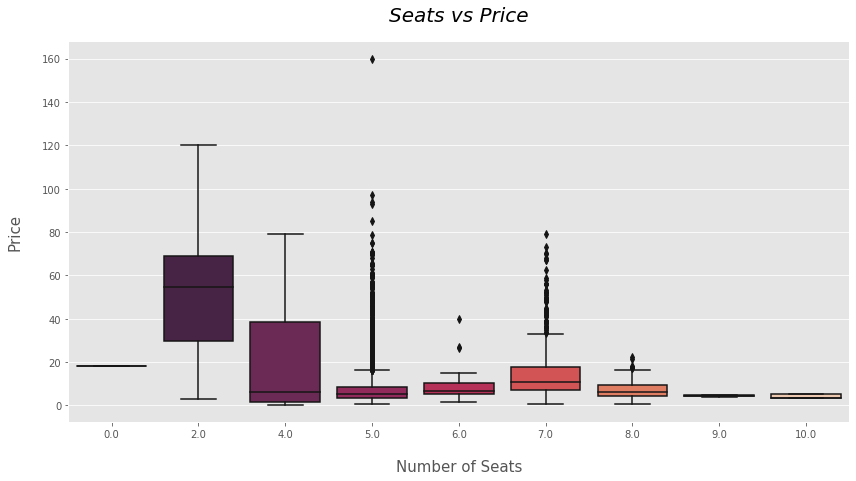

In [57]:
#Seats vs Price
sns.boxplot(x = 'Seats', y = 'Price', data = train_data, palette = 'rocket')
plt.title('Seats vs Price', fontstyle = 'italic', fontsize= 20, pad = 20)
plt.xlabel('Number of Seats', labelpad = 20, fontsize = 15)
plt.ylabel('Price', labelpad = 20, fontsize = 15)

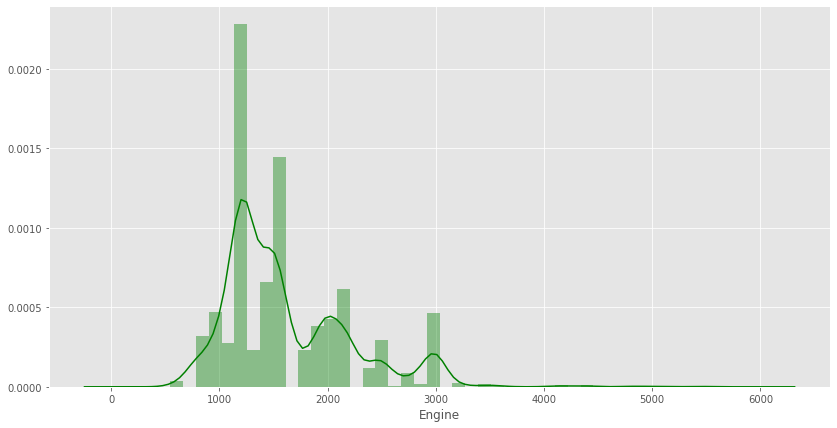

In [58]:
#Engine
sns.distplot(train_data.Engine, color = 'g')

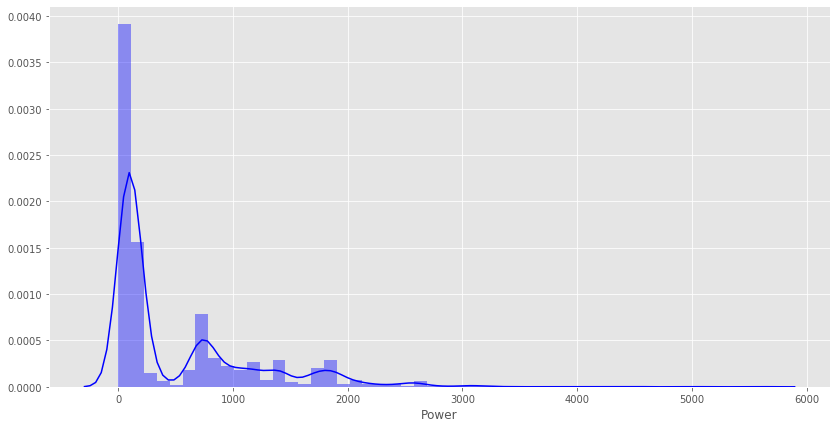

In [59]:
# Power
sns.distplot(train_data['Power'], color = 'blue')

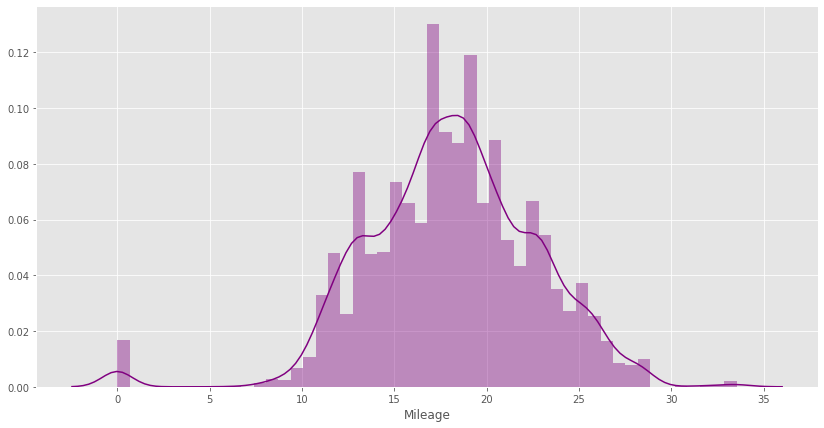

In [60]:
#Mileage
sns.distplot(train_data.Mileage, color = 'purple')

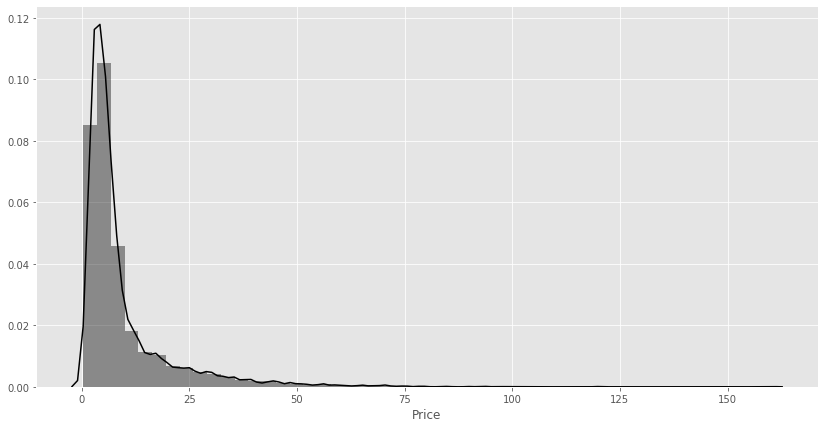

In [61]:
#Price
sns.distplot(train_data.Price, color = 'black')

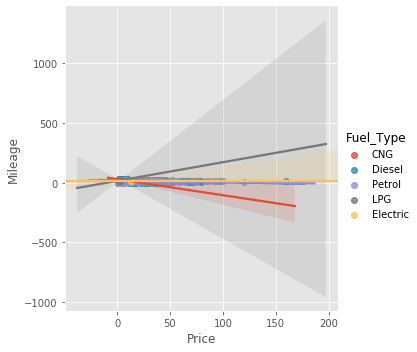

In [62]:
#Pricse vs Mileage vs FuelType
sns.lmplot(x = 'Price', y = 'Mileage', hue = 'Fuel_Type', data = train_data)

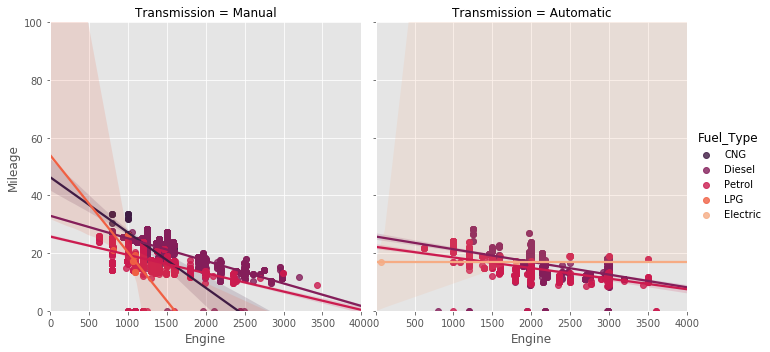

In [63]:
a = sns.lmplot('Engine', 'Mileage', hue = 'Fuel_Type', col = 'Transmission', data = train_data, palette = 'rocket')
a.set(ylim = (0, 100), xlim = (0, 4000))

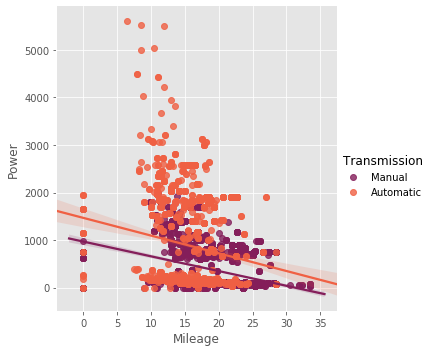

In [64]:
b = sns.lmplot(x = 'Mileage', y = 'Power', hue = 'Transmission', data = train_data, palette = 'rocket')

<Figure size 1440x864 with 0 Axes>

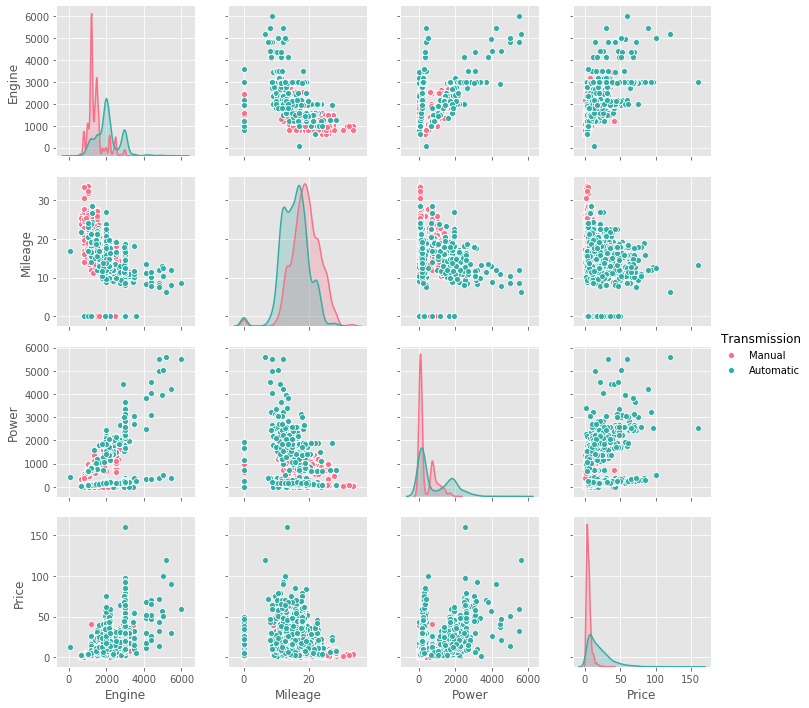

In [65]:
plt.figure(figsize = (20,12))
ax = sns.pairplot(data = train_data, palette = 'husl', hue = 'Transmission', diag_kind = 'kde',
                 vars = ['Engine', 'Mileage', 'Power', 'Price'])

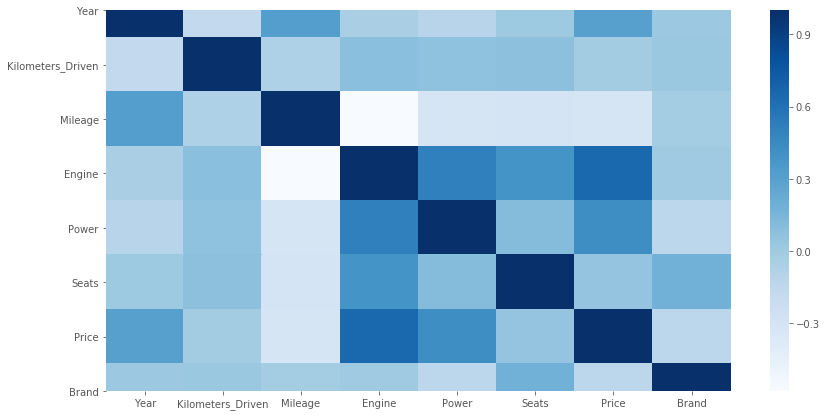

In [66]:
sns.heatmap(train_data.corr(), cmap = 'Blues')

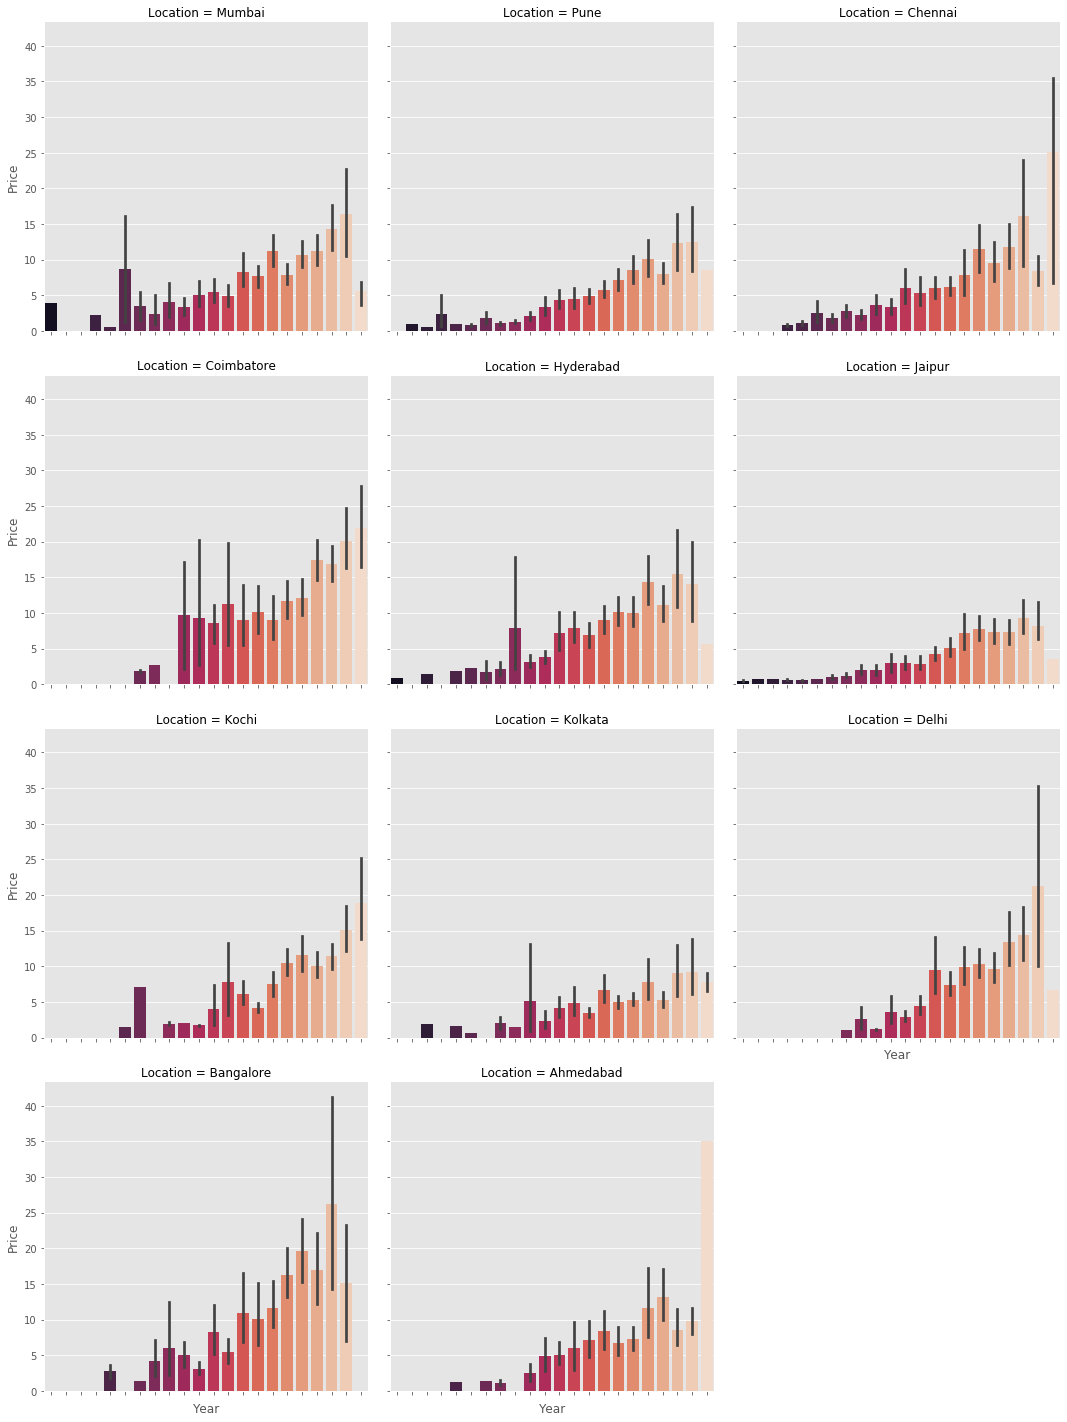

In [67]:
c = sns.catplot(data = train_data, col = 'Location',col_wrap = 3, x = 'Year', y = 'Price', kind = 'bar', palette = 'rocket')
c.set_axis_labels('Year').set_xticklabels(rotation = 90)

In [68]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,18
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,10
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,9
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,18
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,1


In [69]:
train_data = train_data.drop(columns = ['Name'])

In [70]:
test_data = test_data.drop(columns = ['Name'])

In [71]:
train_data.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int32
Power                float64
Seats                float64
Price                float64
Brand                  int32
dtype: object

In [72]:
train_data['Location'] = train_data['Location'].astype(str)

In [73]:
train_data['Location'] = le.fit_transform(train_data['Location'])
test_data['Location'] = le.fit_transform(test_data['Location'])

In [74]:
train_data['Fuel_Type'] = le.fit_transform(train_data['Fuel_Type'])
test_data['Fuel_Type'] = le.fit_transform(test_data['Fuel_Type'])

In [75]:
train_data['Transmission'] = le.fit_transform(train_data['Transmission'])
test_data['Transmission'] = le.fit_transform(test_data['Transmission'])

In [76]:
train_data['Owner_Type'] = le.fit_transform(train_data['Owner_Type'])
test_data['Owner_Type'] = le.fit_transform(test_data['Owner_Type'])

In [77]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,9,2010,72000,0,1,0,26.60,998,58.16,5.0,1.75,18
1,10,2015,41000,1,1,0,19.67,1582,126.20,5.0,12.50,10
2,2,2011,46000,4,1,0,18.20,1199,88.70,5.0,4.50,9
3,2,2012,87000,1,1,0,20.77,1248,88.76,7.0,6.00,18
4,3,2013,40670,1,0,2,15.20,1968,140.80,5.0,17.74,1


In [78]:
test_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,4,2014,40929,0,1,0,32.26,998,58.20,4.0,16
1,3,2013,54493,3,1,2,24.70,796,47.30,5.0,16
2,9,2017,34000,1,1,0,13.68,2393,147.80,7.0,26
3,5,2012,139000,1,1,0,23.59,1364,0.00,5.0,26
4,9,2014,29000,3,1,0,18.50,1197,82.85,5.0,9


#### Data Modelling
Since this is a regression problem, we have used Linear Regression, RandomForestRegressor, DecisionTreeRegressor and XGBoostRegressor. Their accuracies help us to compare which model fits the data the best and gives us the best prediciton. In this case, we see XGBoostRegressor gives the best accuracy hence we use that for the final prediction.

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
sc = StandardScaler()

In [81]:
X_train = train_data.drop(columns = ['Price'])
y_train = train_data['Price']

In [82]:
X_test = test_data

In [83]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [85]:
model = LinearRegression()
k_fold = KFold(n_splits = 10, shuffle = False)
score = cross_val_score(model, X_train, y_train, cv = k_fold, n_jobs = 1)
print(score, '\n')
print("Score:",round(np.mean(score)*100, 2), "\n")

[0.66424755 0.66658533 0.6493813  0.06070678 0.65874074 0.63393555
 0.52415839 0.68879977 0.68237384 0.69267435] 

Score: 59.22 



In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
model2 = RandomForestRegressor(n_estimators = 100)
k_fold = KFold(n_splits = 10, shuffle = False)
score1 = cross_val_score(model2, X_train, y_train, cv = k_fold, n_jobs = 1)
print(score, '\n')
print("Score:",round(np.mean(score1)*100, 2), "\n")

[0.66424755 0.66658533 0.6493813  0.06070678 0.65874074 0.63393555
 0.52415839 0.68879977 0.68237384 0.69267435] 

Score: 87.14 



In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
model3 = DecisionTreeRegressor(criterion = 'mse', max_depth = 3)
k_fold = KFold(n_splits = 10, shuffle = False)
score2 = cross_val_score(model3, X_train, y_train, cv = k_fold, n_jobs = 1)
print(score, '\n')
print("Score:",round(np.mean(score2)*100, 2), "\n")

[0.66424755 0.66658533 0.6493813  0.06070678 0.65874074 0.63393555
 0.52415839 0.68879977 0.68237384 0.69267435] 

Score: 62.12 



In [106]:
from xgboost import XGBRegressor

In [107]:
model4 = XGBRegressor(silent = True, colsample_bytree = 0.6, learning_rate = 0.05, max_depth = 5,
                     n_estimators = 1000)
k_fold = KFold(n_splits = 10, shuffle = False)
score4 = cross_val_score(model4, X_train, y_train, cv = k_fold, n_jobs = 1)
print(score, '\n')
print("Score:",round(np.mean(score4)*100, 2), "\n")

[21:53:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:53:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:53:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu